<a href="https://colab.research.google.com/github/hyo04/ML-Coursework-2/blob/main/02_ML_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Print data description
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
# print feature names used in the data
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

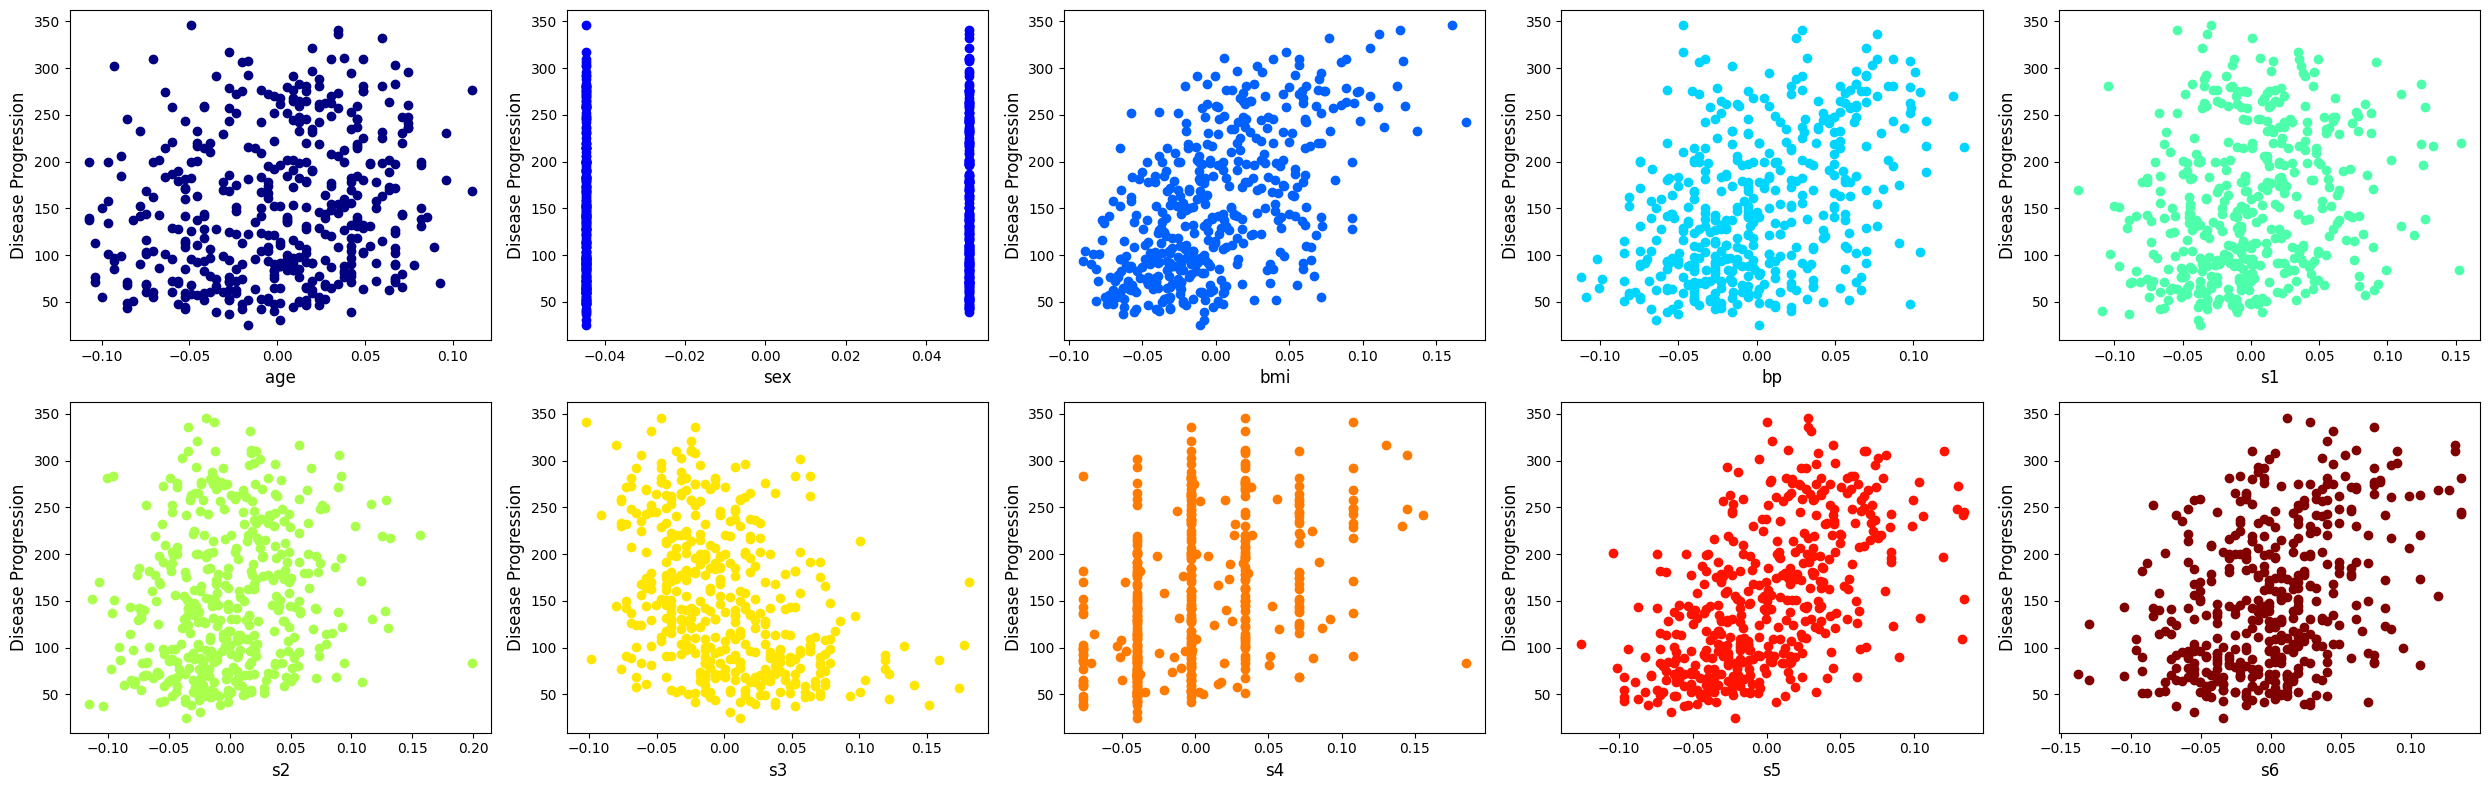

In [4]:
# Create a DataFrame to store the data and target
diabetes_data = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
diabetes_data["DP"] = diabetes['target']

# Set the size of each individual plot
plot_width = 5
plot_height = 4

# Calculate the number of rows and columns for the grid layout
num_features = len(diabetes.feature_names)
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(plot_width * num_cols, plot_height * num_rows))

# Flatten the axes array to iterate over all the subplots
axes = axes.flatten()

# Define a colormap for assigning different colors to each feature plot
colors = plt.cm.jet(np.linspace(0, 1, num_features))

# Plot each feature against the target variable in separate subplots
for index, feature_name in enumerate(diabetes.feature_names):
    axes[index].scatter(diabetes.data[:, index], diabetes.target, color=colors[index])
    axes[index].set_ylabel('Disease Progression', size=12)
    axes[index].set_xlabel(feature_name, size=12)

# Hide any remaining empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [5]:
# function to perform the prediction by multiplying the inputs with weights
def predict_dp(X,W):
    return np.dot(X,W)

In [6]:
# function to calculate the cost (here we use MSE)
def cost(X,W,Y):
    prediction = predict_dp(X,W)
    return ((Y - prediction)**2).mean()

In [7]:
# function to plot the predicted line vs real data
def plot_line(X,W,Y,x_label):
    """Plot a line from slope and intercept"""
    y_vals = predict_dp(X,W)
    plt.figure(figsize=(5, 4))
    plt.xlabel(x_label)
    plt.ylabel('Disease Progression (DP)')
    plt.scatter(X[:,1],Y, color='red', label='Actual')
    plt.plot(X[:,1], y_vals, color='black', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()

In [8]:
# function to plot cost variations as the algorithm iterate
def plot_cost(cost):
    plt.figure(figsize=(5, 4))
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

In [9]:
# function that applies GD and fit the algorithm
def fit(n_iter,X,Y,lr, x_label):
    W0 = []
    W1 = []
    costs = []
    # Incorporate the bias term
    X = np.column_stack((np.ones(len(X)),X))
    #N = len(diabetes['target'])
    W = np.zeros(2)
    c = 0
    for i in range(n_iter):
        pred = predict_dp(X,W)
        W[0] += lr *(Y - pred).mean()
        W[1] += lr *((Y - pred)* X[:,1]).mean()
        W = np.array([W[0],W[1]])
        J = cost(X,W,Y)
        W0.append(W[0])
        W1.append(W[1])
        costs.append(J)
        c = i + 1
        #if i%1000 == 0:
            #print(f"Iteration: {i}, Cost = {J}, Weights = {W}")
            #plot_line(X,W,Y, x_label)
    print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
    plot_line(X,W,Y,x_label)
    plot_cost(costs)
    return W, costs


Iteration: 10000, Cost = 5720.547017205647, Weights = [152.13348416 304.1830741 ]


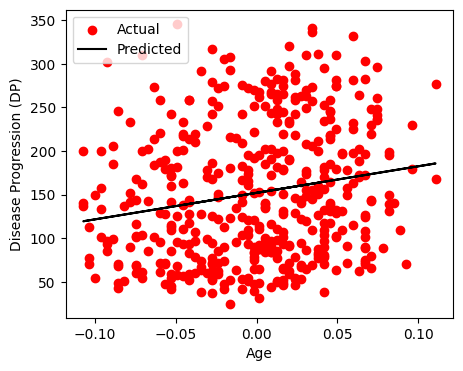

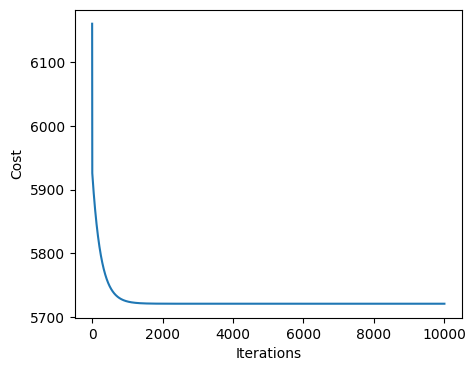

(array([152.13348416, 304.1830741 ]),
 [np.float64(6160.479227680582),
  np.float64(5930.49954276351),
  np.float64(5927.363503666164),
  np.float64(5926.499303071285),
  np.float64(5925.661209065323),
  np.float64(5924.826750545078),
  np.float64(5923.9956890715275),
  np.float64(5923.168008588139),
  np.float64(5922.343695317825),
  np.float64(5921.522735561695),
  np.float64(5920.705115676802),
  np.float64(5919.8908220757085),
  np.float64(5919.079841226255),
  np.float64(5918.272159651333),
  np.float64(5917.467763928658),
  np.float64(5916.66664069056),
  np.float64(5915.868776623743),
  np.float64(5915.074158469078),
  np.float64(5914.282773021377),
  np.float64(5913.494607129172),
  np.float64(5912.709647694499),
  np.float64(5911.927881672681),
  np.float64(5911.149296072112),
  np.float64(5910.373877954033),
  np.float64(5909.601614432329),
  np.float64(5908.832492673306),
  np.float64(5908.066499895482),
  np.float64(5907.303623369371),
  np.float64(5906.543850417276),
  np.

In [10]:
lr = 0.9
n_iter=10000
X = diabetes_data["age"]
Y = diabetes_data["DP"]
fit(n_iter,X,Y,lr, "Age")

## Task 1 [10 marks]

Update the Gradient Descent (GD) code to predict disease progression (DP) based on two different features: body mass index (BMI) and average blood pressure (BP). Follow the same procedure as before to determine the optimal weights for each case.

Execute the modified code to generate the following outcomes:

- Plot illustrating the actual data points and the predicted regression line for disease progression vs BMI according to the final weights obtained.
- Plot illustrating the actual data points and the predicted regression line for disease progression vs average blood pressure (BP) according to the final weights obtained.
- Display the final weights and cost (MSE) obtained after the optimisation process for both cases (keep the values to be used in the same table of tasks 2 and 3).

Iteration: 10000, Cost = 3890.456585461273, Weights = [152.13348416 949.43525905]


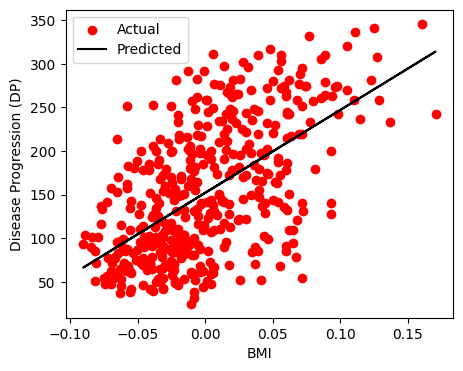

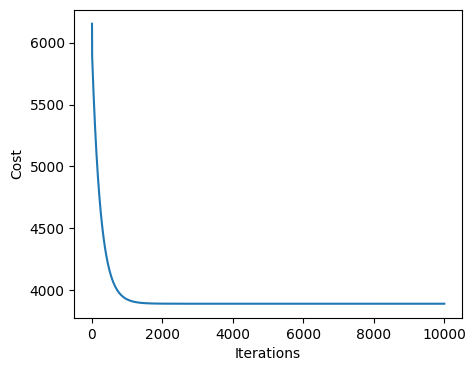

Iteration: 10000, Cost = 4774.113902368687, Weights = [152.13348416 714.73825849]


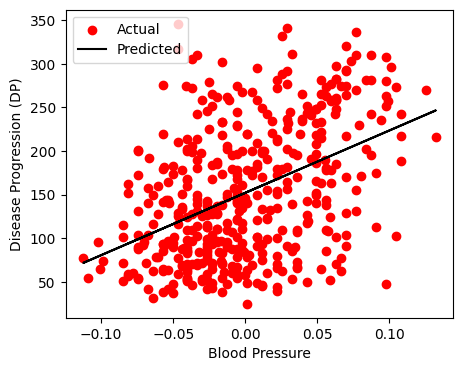

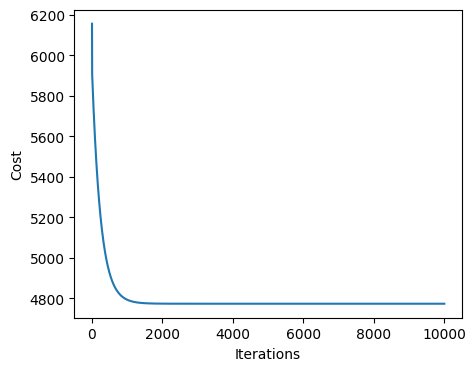

In [11]:
# Task 1
# BMI
lr = 0.9
n_iter=10000
X_bmi = diabetes_data["bmi"]
Y = diabetes_data["DP"]
w_bmi_gd, costs_bmi_gd = fit(n_iter,X_bmi,Y,lr, "BMI")
cost_bmi_gd = costs_bmi_gd[-1]

# BP
X_bp = diabetes_data["bp"]
Y = diabetes_data["DP"]
w_bp_gd, costs_bp_gd = fit(n_iter,X_bp,Y,lr,"Blood Pressure")
cost_bp_gd = costs_bp_gd[-1]

In [12]:
# Task 1 (continued)

table_md = f"""
Final weights and cost after optimisation process

| Feature | Method | Weights (w0, w1)            |  Cost (MSE) |
|---------|--------|-----------------------------|-------------|
| BMI     | GD     | {w_bmi_gd} |  {cost_bmi_gd:.4f}  |
| BP      | GD     | {w_bp_gd} |  {cost_bp_gd:.4f}  |
"""

print(table_md)


Final weights and cost after optimisation process

| Feature | Method | Weights (w0, w1)            |  Cost (MSE) |
|---------|--------|-----------------------------|-------------|
| BMI     | GD     | [152.13348416 949.43525905] |  3890.4566  |
| BP      | GD     | [152.13348416 714.73825849] |  4774.1139  |



## Task 2 [40 marks]

In this section, we will apply the closed-form solution to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your notebook:

1. **Implementation of Closed-Form Solution:**
   - Implement a colsed-form solution code to solve the same problem.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and cost (MSE) derived from the Gradient Descent (GD) approach and those acquired through the closed-form solution. Summarise your results in a table (same table for Tasks 2 & 3).

3. **Visualisation of Closed-Form Solution:**
   - Generate a plot that illustrates the line produced by the closed-form solution in relation to the original dataset, as in the GD example.



> **Hint:** To facilitate the process, explore the `numpy.linalg.pinv` function available within the Numpy library. This function offers the capability to compute the (Moore-Penrose) pseudo-inverse of a matrix, which can significantly aid your calculations.



In [13]:
# Task 2
def closed_form_solution(X,Y):
  #add a bias term
  X = np.column_stack((np.ones(len(X)), X))

  #pseudoinverse of X (works even if X^TX is not invertible)
  #returns X+=(X⊤X)−1X⊤ -> can be used directly to find w*
  x_pinv = np.linalg.pinv(X)

  W = x_pinv @ Y

  return W, X


In [14]:
# Task 2 (continued)
Y = diabetes_data["DP"]

# BMI
X_bmi = diabetes_data["bmi"]
w_bmi_cf, X_bmi_cf = closed_form_solution(X_bmi,Y)
cost_bmi_cf = cost(X_bmi_cf,w_bmi_cf,Y)

# Blood Pressure
X_bp = diabetes_data["bp"]
w_bp_cf, X_bp_cf = closed_form_solution(X_bp,Y)
cost_bp_cf = cost(X_bp_cf,w_bp_cf,Y)


In [15]:
# Task 2 (continued)

table_md = f"""
Comparison of Gradient Descent vs Closed-Form Solution Results

| Feature | Method | Weights (w0, w1)            |  Cost (MSE) |
|---------|--------|-----------------------------|-------------|
| BMI     | GD     | {w_bmi_gd} |  {cost_bmi_gd:.4f}  |
| BMI     | CF     | {w_bmi_cf} |  {cost_bmi_cf:.4f}  |
| BP      | GD     | {w_bp_gd} |  {cost_bp_gd:.4f}  |
| BP      | CF     | {w_bp_cf} |  {cost_bp_cf:.4f}  |
"""

print(table_md)




Comparison of Gradient Descent vs Closed-Form Solution Results

| Feature | Method | Weights (w0, w1)            |  Cost (MSE) |
|---------|--------|-----------------------------|-------------|
| BMI     | GD     | [152.13348416 949.43525905] |  3890.4566  |
| BMI     | CF     | [152.13348416 949.43526038] |  3890.4566  |
| BP      | GD     | [152.13348416 714.73825849] |  4774.1139  |
| BP      | CF     | [152.13348416 714.7382595 ] |  4774.1139  |



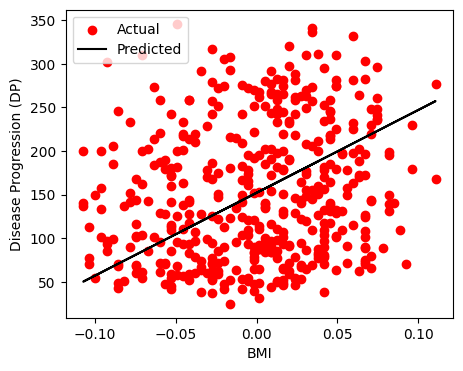

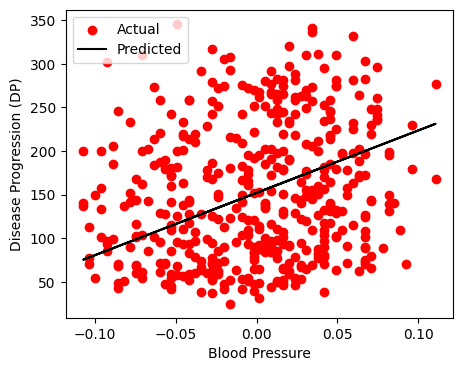

In [16]:
# Task 2 (continued)
# Verification of Closed-Form solution

# Incorporate the bias term for bmi
X_bmi_b= np.column_stack((np.ones(len(X_bmi)),X))
plot_line(X_bmi_b, w_bmi_cf, Y, "BMI")


# Incorporate the bias term for bp
X_bp_b= np.column_stack((np.ones(len(X_bp)),X))
plot_line(X_bp_b, w_bp_cf, Y, "Blood Pressure")




## Task 3 [15 marks]

In this section, we will use scikit-learn package to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your notebook:

1. **Implementation of sckit-learn approach:**
   - Implement a code using sckit-learn to solve the same problems as in tasks 1 & 2.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and MSE derived from the Gradient Descent (GD)  and closed form solution approaches and those acquired through scikit-learn package (include the results in the same table of tasks 1 & 2).

3. **Visualisation of Results:**
   - Generate a plot that illustrates the line produced by scikit-learn package in relation to the original dataset, as in the GD and closed-form examples.

4. **Estimating the Error:**
  - Use the following command from scikit-learn to estimate the MSE error on each case.
  ```python
  from sklearn.metrics import mean_squared_error
  ```

In [17]:
# Task 3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = diabetes_data["bmi"]
Y = diabetes_data["DP"]

X = X.to_frame()

model = LinearRegression()
model.fit(X,Y)

print(model.coef_)
print(model.intercept_)

[949.43526038]
152.13348416289617


In [18]:
# Task 3 (continued)


In [19]:
# Task 3 (continued)


In [20]:
# Task 3 (continued)


## Task 4 [10 marks]

Write a code that use all the 10 features in the data as inputs to the regressor in order to predict the disease pregression (DP). Then, rank the features by their importance (using their absolute weight values). Finally, craete a plot that shows how the mean squared error (MSE) changes as you progressively add features, starting from the most important ones.

From the resulting plot, identify the approximate number of features you would choose to keep (i.e. the point where adding more features no longer significantly reduces the MSE (the 'elbow point')). Treat this as a visual, judgment-based choice, and include a brief justification in your write-up referring to what you observe in the plot.





> You are allowed to import the following in this task:
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
```



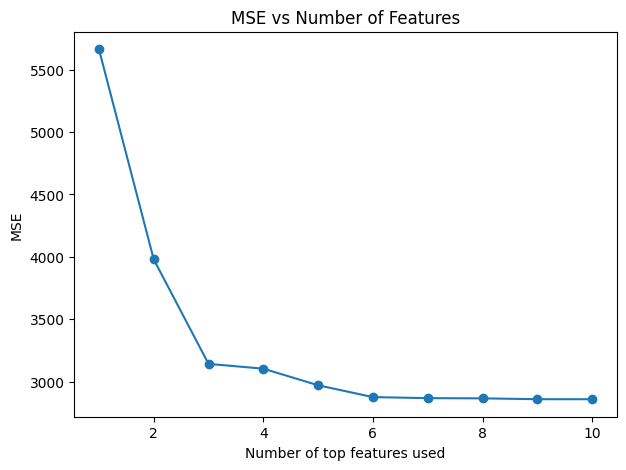

(['s1', 's5', 'bmi', 's2', 'bp', 'sex', 's4', 's3', 's6', 'age'],
 [5663.315623739354,
  3979.7097540556524,
  3142.6921582550285,
  3104.441855717973,
  2971.3811528998367,
  2876.683251787016,
  2868.343466201382,
  2866.6729630254813,
  2859.882571023872,
  2859.6963475867506])

In [21]:
# Task 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load all 10 features
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
feature_names = diabetes.feature_names

model = LinearRegression()
model.fit(X, Y)

# Rank features by importance using absolute weight values
importance = np.abs(model.coef_)
ranked_idx = np.argsort(importance)[::-1]
ranked_features = [feature_names[i] for i in ranked_idx]

# Change of MSE as features are added in order of importance
mse_list = []
for k in range(1, len(feature_names) + 1):
    X_sub = X[:, ranked_idx[:k]]
    model_k = LinearRegression()
    model_k.fit(X_sub, Y)
    preds = model_k.predict(X_sub)
    mse = mean_squared_error(Y, preds)
    mse_list.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), mse_list, marker='o')
plt.xlabel("Number of top features used")
plt.ylabel("MSE")
plt.title("MSE vs Number of Features")
plt.show()

ranked_features, mse_list


# k-fold Validation



In machine learning, assessing the performance of a model is crucial, especially when working with limited data. One powerful technique for evaluating models is k-Fold Cross-Validation. This method involves partitioning the dataset into multiple subsets, or "folds," to comprehensively assess a model's generalization capability.

The term "k" in k-Fold refers to the number of folds the dataset is divided into. Typically, a common choice is k=10, resulting in 10-fold cross-validation. The primary goal of this technique is to estimate how well a machine learning model will perform on unseen data. By simulating the model's performance across multiple partitions of the dataset, we gain insights into its general behavior and potential for overfitting.


The procedure for k-Fold Cross-Validation is as follows:

1. Randomly shuffle the dataset to ensure randomness in fold assignments.
2. Divide the dataset into "k" approximately equal-sized groups (folds).
3. For each fold "i" (from 1 to k):
   - Treat fold "i" as the validation set.
   - Use the remaining k-1 folds as the training set.
   - Train a machine learning model on the training set and evaluate it on the validation set.
   - Retain the evaluation score and discard the model.
4. Calculate the mean and optionally the variance (e.g., standard deviation) of the evaluation scores to summarize the model's performance.

It's crucial to note that each data point appears in the validation set once and in the training set k-1 times, ensuring comprehensive assessment.


1. **Less Bias**: k-Fold Cross-Validation often yields less biased estimates of model performance compared to a simple train/test split.
2. **Comprehensive Evaluation**: All data points get an opportunity to be both in training and validation sets, leading to a more holistic evaluation.
3. **Hyperparameter Tuning**: Hyperparameter tuning can be done on the training set within each fold, preventing data leakage and over-optimistic estimates.
4. **Variance Estimate**: By calculating the variance of evaluation scores, we gain insights into the model's stability across different subsets of data.


## Task 5 [25 marks]

In this task, you will implement k-Fold Cross-Validation on the Diabetes dataset using scikit-learn.

Your task is to write a code that performs the following steps:

1. Load the Diabetes dataset.
2. Define the number of folds for cross-validation.
3. Calculate the number of samples per fold.
4. Perform k-Fold Cross-Validation:
   - For each fold:
     - Split the data into training and test sets.
     - Train a Linear Regression model on the training set.
     - Make predictions on the test set.
     - Calculate the Mean Squared Error (MSE) for the predictions.
     - Print the MSE for each fold.
     - Store the MSE values in a list.
5. Calculate the average MSE across all folds and print it.

> In this task you are allowed to use scikit-learn library to fit the linear regression model and for calculating the MSE. However, you are expected to create your own code (using numpy) for k-fold validation set. Below are the corresponding commands that you can import:
- `from sklearn.linear_model import LinearRegression`
- `from sklearn.metrics import mean_squared_error`

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Define number of folds
k = 10

# Calculate number of samples per fold
fold_size = X.shape[0]//k

mse_list = []

# Perform k-fold Cross-Validation
for fold in range(k):

  start = fold_size * fold
  end = start + fold_size

  x_train = np.concatenate((X[:start], X[end:]), axis=0)
  y_train = np.concatenate((Y[:start], Y[end:]), axis=0)


  x_test = X[start:end]
  y_test = Y[start:end]

  # Train model using the test data
  model = LinearRegression()
  model.fit(x_train, y_train)

  # Make prediction
  y_pred = model.predict(x_test)

  # Compute MSE
  mse = mean_squared_error(y_test, y_pred)
  mse_list.append(mse)

# Compute the average MSE across all folds and print
avg_mse = np.mean(mse_list)

print("\nAverage MSE :", round(avg_mse, 3))


Average MSE : 3016.008
